## Zadanie: przestępczość
1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA 
https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population
oraz dane dotyczące skrótów poszczególnych stanów
https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations. 
Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

### 1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [2]:
import pandas as pd
fatal_police_shoot = pd.read_csv('fatal-police-shootings-data.csv')
fatal_police_shoot.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### 2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [43]:
fatal_police_shoot.pivot_table(index='race', values='signs_of_mental_illness', aggfunc='count')

,signs_of_mental_illness
race,
A,93
B,1298
H,902
N,78
O,48
W,2476


In [37]:
casualties=fatal_police_shoot.pivot_table(index='race', columns='signs_of_mental_illness', aggfunc='size')
casualties

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [86]:
casualties1=fatal_police_shoot.pivot_table(index=['race','name'], columns='signs_of_mental_illness', aggfunc='size').fillna('False')
casualties1

signs_of_mental_illness        False   True
race name                                  
A    Aaron Hong                False    1.0
     Andrew Kana                 1.0  False
     Andy Vo                     1.0  False
     Anovath Troy Kongvongxay  False    1.0
     Antonio Aquino              1.0  False
...                              ...    ...
W    Zackary Ryan Hoppe          1.0  False
     Zane Anthony James          1.0  False
     Zane Blaisdell              1.0  False
     Zane Terryn               False    1.0
     Zendall Noble               1.0  False

[4858 rows x 2 columns]

In [87]:
casualties2=fatal_police_shoot.pivot_table(index=['race','name','date','state'], columns='signs_of_mental_illness', aggfunc='size').fillna('')
casualties2

signs_of_mental_illness                        False True
race name                     date       state           
A    Aaron Hong               2019-07-01 GA           1.0
     Andrew Kana              2018-11-12 OK      1.0     
     Andy Vo                  2018-01-05 CA      1.0     
     Anovath Troy Kongvongxay 2018-11-05 SC           1.0
     Antonio Aquino           2018-04-06 NV      1.0     
...                                              ...  ...
W    Zackary Ryan Hoppe       2019-06-28 TX      1.0     
     Zane Anthony James       2018-05-29 UT      1.0     
     Zane Blaisdell           2020-02-09 MI      1.0     
     Zane Terryn              2015-06-14 FL           1.0
     Zendall Noble            2019-06-06 KY      1.0     

[4892 rows x 2 columns]

In [88]:
casualties_size=fatal_police_shoot.pivot_table(index='race', columns='signs_of_mental_illness', aggfunc='size')
casualties_size

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


### 3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [21]:
import datetime as dt

In [53]:
casualties=fatal_police_shoot.pivot_table(index='race', columns='signs_of_mental_illness', aggfunc='size')
casualties

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


największy odsetek znamion choroby psychicznej podczas interwencji charakteryzuje się rasa W

In [62]:
casualties_percent=fatal_police_shoot.pivot_table(index='race', values='signs_of_mental_illness', aggfunc='count')
casualties_percent

,signs_of_mental_illness
race,
A,93
B,1298
H,902
N,78
O,48
W,2476


In [115]:
casualties_percent1=fatal_police_shoot.pivot_table(index='race', values='signs_of_mental_illness', aggfunc={'signs_of_mental_illness':
                                                                                                            'sum','race':'size'})
casualties_percent1

,race,signs_of_mental_illness
race,,
A,93,24
B,1298,184
H,902,157
N,78,14
O,48,11
W,2476,713


In [124]:
casualties_percent1['%mental_mental_ill_race']=(casualties_percent1.signs_of_mental_illness/casualties_percent1.race*100).round(2)
casualties_percent1
# casualties_percent1['%mental_ill_total']=(casualties_percent1.signs_of_mental_illness/casualties_percent1.groupby(level=0).signs_of_mental_illness.trnsform(sum)*100)

,race,signs_of_mental_illness,%mental_mental_ill_race
race,,,
A,93,24,25.81
B,1298,184,14.18
H,902,157,17.41
N,78,14,17.95
O,48,11,22.92
W,2476,713,28.80


In [133]:
casualties_percent1['%mental_mental_ill_race']=(casualties_percent1.signs_of_mental_illness/casualties_percent1.race*100).round(2)
casualties_percent1['%mental_ill_total']=((casualties_percent1.signs_of_mental_illness/casualties_percent1.signs_of_mental_illness.sum()*100)).round(2)
casualties_percent1

,race,signs_of_mental_illness,%mental_mental_ill_race,%mental_ill_total
race,,,,
A,93,24,25.81,2.18
B,1298,184,14.18,16.68
H,902,157,17.41,14.23
N,78,14,17.95,1.27
O,48,11,22.92,1.00
W,2476,713,28.80,64.64


### z przedstawionego powyżej zestawienia wynika, iż największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzyje się rasa W - 64,64% w ogóle osób wykazujących znamiona choroby psychicznej oraz 28,80% ogółu osób w rasie W.

In [123]:
casualties2=fatal_police_shoot.pivot_table(index=['race','name','date','state'], columns='signs_of_mental_illness', aggfunc='size').fillna('')
casualties2.head()

signs_of_mental_illness                        False True
race name                     date       state           
A    Aaron Hong               2019-07-01 GA           1.0
     Andrew Kana              2018-11-12 OK      1.0     
     Andy Vo                  2018-01-05 CA      1.0     
     Anovath Troy Kongvongxay 2018-11-05 SC           1.0
     Antonio Aquino           2018-04-06 NV      1.0

## Ad. 4 Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.


In [149]:
import datetime as dt

fatal_police_shoot['date'] = pd.to_datetime(fatal_police_shoot['date'])
fatal_police_shoot['weekday']=fatal_police_shoot['date'].dt.day_name()
fatal_police_shoot.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [152]:
fatal_police_shoot.sort_values(by='weekday')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1831,2037,Andrew Depeiza,2016-11-11,shot and Tasered,unarmed,NaN,M,B,East Point,GA,False,attack,Foot,False,Friday
1830,2046,William Ray Score,2016-11-11,shot,gun,47.0,M,NaN,Montrose County,CO,False,attack,Not fleeing,False,Friday
1829,2043,Marco Romero,2016-11-11,shot,gun,NaN,M,H,Boise,ID,False,attack,Other,False,Friday
1828,2039,Brian Gaither,2016-11-11,shot,NaN,24.0,M,W,Grand Junction,CO,False,attack,Car,False,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,2571,Robin White,2017-05-10,shot,gun,50.0,F,B,St. Louis,MO,False,attack,Not fleeing,False,Wednesday
2313,2570,Terrell Kyreem Johnson,2017-05-10,shot,knife,24.0,M,B,Portland,OR,True,other,Foot,False,Wednesday
4593,5009,Fares J. Al-Samno,2019-09-04,shot,knife,29.0,M,W,Coeur d'Alene,ID,False,attack,Not fleeing,False,Wednesday
2466,2743,Tiffany Lynn Potter,2017-07-05,shot,gun,29.0,F,W,Des Moines,IA,False,attack,Foot,True,Wednesday


In [175]:
fatal_police_shoot_daygroup = fatal_police_shoot.groupby(by='weekday')

In [176]:
fatal_police_shoot_daygroup.size().head()

weekday
Friday      761
Monday      726
Saturday    721
Sunday      753
Thursday    810
dtype: int64

In [181]:
fatal_police_shoot_daygroup.count()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
weekday,,,,,,,,,,,,,,
Friday,761,761,761,761,729,715,761,674,761,761,761,761,722,761
Monday,726,726,726,726,698,700,726,671,726,726,726,726,696,726
Saturday,721,721,721,721,687,695,720,648,721,721,721,721,691,721
Sunday,753,753,753,753,722,722,753,675,753,753,753,753,731,753
Thursday,810,810,810,810,785,775,810,734,810,810,810,810,767,810
Tuesday,816,816,816,816,781,789,815,735,816,816,816,816,770,816
Wednesday,829,829,829,829,787,785,829,758,829,829,829,829,790,829


In [196]:
fatal_police_shoot_daygroup_agg = fatal_police_shoot_daygroup.agg({'weekday':'count'})
fatal_police_shoot_daygroup_agg

,weekday
weekday,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [209]:
fatal_police_shoot_count_ren = fatal_police_shoot_daygroup_agg.rename(columns={'weekday':'Total_numbers'})
fatal_police_shoot_count_ren

,Total_numbers,day_id
weekday,,
Friday,761,4
Monday,726,0
Saturday,721,5
Sunday,753,6
Thursday,810,3
Tuesday,816,1
Wednesday,829,2


In [210]:
sorter = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [211]:
fatal_police_shoot_count_ren['day_id'] = fatal_police_shoot_count_ren.index
fatal_police_shoot_count_ren['day_id'] = fatal_police_shoot_count_ren['day_id'].map(sorterIndex)
fatal_police_shoot_count_ren

,Total_numbers,day_id
weekday,,
Friday,761,4
Monday,726,0
Saturday,721,5
Sunday,753,6
Thursday,810,3
Tuesday,816,1
Wednesday,829,2


In [212]:
fatal_police_shoot_count_ren.sort_values('day_id', inplace=True)
fatal_police_shoot_count_ren

,Total_numbers,day_id
weekday,,
Monday,726,0
Tuesday,816,1
Wednesday,829,2
Thursday,810,3
Friday,761,4
Saturday,721,5
Sunday,753,6


Text(0.5, 1.0, 'Liczba interwencji według dnia tygodnia')

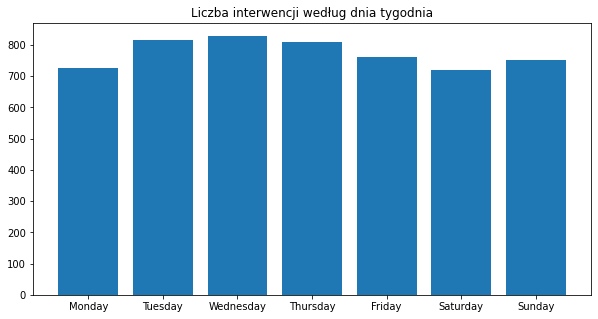

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
ax.bar(fatal_police_shoot_count_ren.day_id, fatal_police_shoot_count_ren.Total_numbers)
ax.set_xticks(fatal_police_shoot_count_ren.day_id)
ax.set_xticklabels(fatal_police_shoot_count_ren.index)
plt.title('Liczba interwencji według dnia tygodnia')

## 5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA [https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population]  oraz dane dotyczące skrótów poszczególnych stanów [https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations]. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [243]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize

data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population',header=0)
df_population = data[0]
df_population.head(15)

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%


In [254]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations',header=1)
df_states_abbv = data[0]
df_states_abbv.head(30)

,Codes:,Codes:.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USPS,2-letter codes used by the United States Posta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USCG,2-letter codes used by the United States Coast...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abbreviations:,Abbreviations:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GPO,Older variable-length official US Government P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AP,Abbreviations from the AP Stylebook (bold red ...,Abbreviations from the AP Stylebook (bold red ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Otherabbreviations
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Otherabbreviations
9,United States of America,Federal state,.mw-parser-output .monospaced{font-family:mono...,US,00,NaN,NaN,U.S.,U.S.,U.S.A.


Tabela nieuporządkowana, więc pozbywam się kilku kolumn

In [255]:
df_states_abbv.drop(['Unnamed: 2','Unnamed: 4','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1, inplace=True)

In [256]:
df_states_abbv

,Codes:,Codes:.1,Unnamed: 3,Unnamed: 5
0,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digi...",NaN,NaN
1,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN
2,USPS,2-letter codes used by the United States Posta...,NaN,NaN
3,USCG,2-letter codes used by the United States Coast...,NaN,NaN
4,Abbreviations:,Abbreviations:,NaN,NaN
...,...,...,...,...
82,Nebraska,Obsolete postal code[g],NaN,NB
83,Northern Mariana Islands,Obsolete postal code[h],NaN,CM
84,Panama Canal Zone,Obsolete postal code,NaN,CZ
85,Philippine Islands,Obsolete postal code,NaN,PI


zmieniam kasuję kolejne 2 kolumny

In [270]:
df_states_abbv.drop(['Codes:.1','Unnamed: 3'], axis=1, inplace=True)
df_states_abbv

KeyError: "['Codes:.1', 'Unnamed: 3'] not found in axis"

zmieniam nazwy kolumn aby dopasować do nazw tabeli List_of_U.S._state_and_territory_abbreviations

In [259]:
df_states_abbv.rename(columns={'Codes:':'State','Unnamed: 5':'State_abbv'}, inplace=True)

In [260]:
df_states_abbv

,State,State_abbv
0,ISO,NaN
1,ANSI,NaN
2,USPS,NaN
3,USCG,NaN
4,Abbreviations:,NaN
...,...,...
82,Nebraska,NB
83,Northern Mariana Islands,CM
84,Panama Canal Zone,CZ
85,Philippine Islands,PI


zmieniam indeks tabeli na State

In [262]:
df_states_abbv.set_index('State', inplace=True)

In [267]:
df_states_abbv.dropna(inplace=True)

In [305]:
df_states_abbv

,State_abbv
State,
Name and status of region,USPS
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
...,...
Nebraska,NB
Northern Mariana Islands,CM
Panama Canal Zone,CZ


dodaję metodą join tabelę ze skrótami nazw stanów do tabeli List_of_U.S._state_and_territory_abbreviations

In [306]:
df_population_joined = df_population.join(other=df_states_abbv, on='State')
df_population_joined

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]",State_abbv
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%,CA
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%,TX
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%,FL
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%,NY
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56.0,56.0,Northern Mariana Islands,55194,"53,883[7]",2.4%,+1311,1 (non-voting),NaN,—,—,0.02%,CM
56,NaN,NaN,Contiguous United States,325386357,306675006,6.2%,+19011351,432,616262,753209,708285,98.38%,NaN
57,NaN,NaN,The fifty states,327533795,308143836,6.3%,+19389959,435,612213,752951,708405,99.02%,NaN
58,NaN,NaN,Fifty states + D.C.,328300544,308745538,6.3%,+19493985,435 (+ 1 non-voting),610111,—,—,99.24%,NaN


In [274]:
df_population_joined.head(25)

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]",State_abbv
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%,CA
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%,TX
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%,FL
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%,NY
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%,PA
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%,IL
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%,OH
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%,GA
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%,NC
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%,MI


In [307]:
df_population_2019 = df_population_joined[['State','State_abbv','Population estimate, July 1, 2019[2]']].dropna()

In [308]:
df_population_2019

,State,State_abbv,"Population estimate, July 1, 2019[2]"
0,California,CA,39512223
1,Texas,TX,28995881
2,Florida,FL,21477737
3,New York,NY,19453561
4,Pennsylvania,PA,12801989
5,Illinois,IL,12671821
6,Ohio,OH,11689100
7,Georgia,GA,10617423
8,North Carolina,NC,10488084
9,Michigan,MI,9986857


In [309]:
df_population_2019.rename(columns={'State_abbv':'state'}, inplace=True)

In [310]:
df_population_2019

,State,state,"Population estimate, July 1, 2019[2]"
0,California,CA,39512223
1,Texas,TX,28995881
2,Florida,FL,21477737
3,New York,NY,19453561
4,Pennsylvania,PA,12801989
5,Illinois,IL,12671821
6,Ohio,OH,11689100
7,Georgia,GA,10617423
8,North Carolina,NC,10488084
9,Michigan,MI,9986857


In [311]:
df_population_2019.set_index('state', inplace=True)

In [312]:
df_population_2019

,State,"Population estimate, July 1, 2019[2]"
state,,
CA,California,39512223
TX,Texas,28995881
FL,Florida,21477737
NY,New York,19453561
PA,Pennsylvania,12801989
IL,Illinois,12671821
OH,Ohio,11689100
GA,Georgia,10617423
NC,North Carolina,10488084


Łączę powstałą tabelę z liczbą mieszkańców w poszczególnych stanach z bazą danych dotyczącą śmiertelnych interwencji policji w USA

In [313]:
fatal_police_shoot_joined = fatal_police_shoot.join(other=df_population_2019, on='state')
fatal_police_shoot_joined

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,State,"Population estimate, July 1, 2019[2]"
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7614893
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,Oregon,4217737
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,Kansas,2913314
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,California,39512223
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,Colorado,5758736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,Missouri,6137428
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,California,39512223
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,Kansas,2913314
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,Illinois,12671821


In [319]:
df_incidents_state = fatal_police_shoot_joined['State'].value_counts()
df_incidents_state

California              799
Texas                   481
Florida                 350
Arizona                 254
Colorado                195
Georgia                 182
Oklahoma                164
North Carolina          156
Ohio                    155
Washington              152
Missouri                141
Tennessee               139
Louisiana               109
Pennsylvania            108
New Mexico              106
Illinois                104
Alabama                 104
New York                101
Nevada                   96
Kentucky                 95
Indiana                  95
Virginia                 95
Wisconsin                91
Oregon                   88
South Carolina           88
Arkansas                 83
Maryland                 79
Michigan                 78
New Jersey               68
Mississippi              65
Minnesota                61
Utah                     60
West Virginia            54
Kansas                   50
Idaho                    42
Alaska              

In [320]:
df_incidents_state = fatal_police_shoot_joined['State'].value_counts().rename_axis('State').to_frame('counts')
df_incidents_state

,counts
State,
California,799
Texas,481
Florida,350
Arizona,254
Colorado,195
Georgia,182
Oklahoma,164
North Carolina,156
Ohio,155


In [321]:
fatal_police_shoot_population = fatal_police_shoot_joined[['State','Population estimate, July 1, 2019[2]']]
fatal_police_shoot_population

,State,"Population estimate, July 1, 2019[2]"
0,Washington,7614893
1,Oregon,4217737
2,Kansas,2913314
3,California,39512223
4,Colorado,5758736
...,...,...
5411,Missouri,6137428
5412,California,39512223
5413,Kansas,2913314
5414,Illinois,12671821


In [322]:
fatal_police_shoot_pop = fatal_police_shoot_population.drop_duplicates()
fatal_police_shoot_pop

,State,"Population estimate, July 1, 2019[2]"
0,Washington,7614893
1,Oregon,4217737
2,Kansas,2913314
3,California,39512223
4,Colorado,5758736
5,Oklahoma,3956971
6,Arizona,7278717
8,Iowa,3155070
9,Pennsylvania,12801989
11,Texas,28995881


In [323]:
fatal_police_shoot_pop_joined = fatal_police_shoot_pop.join(other=df_incidents_state, on='State')
fatal_police_shoot_pop_joined

,State,"Population estimate, July 1, 2019[2]",counts
0,Washington,7614893,152
1,Oregon,4217737,88
2,Kansas,2913314,50
3,California,39512223,799
4,Colorado,5758736,195
5,Oklahoma,3956971,164
6,Arizona,7278717,254
8,Iowa,3155070,32
9,Pennsylvania,12801989,108
11,Texas,28995881,481


In [328]:
fatal_shoot_states = fatal_police_shoot_pop_joined.rename(columns={'Population estimate, July 1, 2019[2]':'Population_estimate_July_2019'})
fatal_shoot_states

,State,Population_estimate_July_2019,counts
0,Washington,7614893,152
1,Oregon,4217737,88
2,Kansas,2913314,50
3,California,39512223,799
4,Colorado,5758736,195
5,Oklahoma,3956971,164
6,Arizona,7278717,254
8,Iowa,3155070,32
9,Pennsylvania,12801989,108
11,Texas,28995881,481


In [332]:
fatal_shoot_states['fatal_incidents_on_1000_citizens'] = fatal_shoot_states.apply(lambda row: (row.counts/row.Population_estimate_July_2019)*1000, axis=1)
fatal_shoot_states[['State','Population_estimate_July_2019','counts','fatal_incidents_on_1000_citizens']].head(25)

,State,Population_estimate_July_2019,counts,fatal_incidents_on_1000_citizens
0,Washington,7614893,152,0.019961
1,Oregon,4217737,88,0.020864
2,Kansas,2913314,50,0.017163
3,California,39512223,799,0.020222
4,Colorado,5758736,195,0.033862
5,Oklahoma,3956971,164,0.041446
6,Arizona,7278717,254,0.034896
8,Iowa,3155070,32,0.010142
9,Pennsylvania,12801989,108,0.008436
11,Texas,28995881,481,0.016589


### Baza powyższa w kolumnie fatal_incidents_on_1000_citizens pokazuje liczbę śmiertelnych interwencji policji w USA w przeliczeniu na 1000 mieszkańców każdego stanu
